# NNJA-AI from BrightBand

In [1]:
import torch
import matplotlib.pyplot as plt
from notebook_setup import device
import numpy as np
# change device to whatever you want to use
device = torch.device('cuda:0')
%load_ext autoreload
%autoreload 2

torch.manual_seed(0)

## Data loading

In [2]:
from nnja.io import _check_authentication
from nnja.dataset import NNJADataset

if _check_authentication():
    from nnja import DataCatalog

In [3]:
catalog = DataCatalog(skip_manifest=True)  # skip_manifest=True avoids scanning GCS for dataset contents, just a bit faster
print("catalog json:", catalog.json_uri)
catalog.list_datasets()

catalog json: gs://nnja-ai/data/v1-preview/catalog.json


['amsua-1bamua-NC021023',
 'atms-atms-NC021203',
 'mhs-1bmhs-NC021027',
 'cris-crisf4-NC021206',
 'iasi-mtiasi-NC021241',
 'conv-adpsfc-NC000001',
 'conv-adpsfc-NC000002',
 'conv-adpsfc-NC000007',
 'conv-adpsfc-NC000101']

In [4]:
ds: NNJADataset = catalog.search("amsua")[0]
ds.load_manifest()
print(ds.info())

Dataset 'amsua-1bamua-NC021023': AMSU-A Level 1B brightness temperature data from NOA3-15,-16,-17,-18, -19 (ATOVS), METOP-2,-1
Tags: amsu, brightness temperature, satellite, METOP, NOAA
Files: 1339 files in manifest
Variables: 49


In [5]:
list(ds.variables.values())

[NNJAVariable("MSG_TYPE" (secondary descriptors), Source message type),
 NNJAVariable("MSG_DATE" (secondary descriptors), Message valid timestamp),
 NNJAVariable("MSG_IDX" (secondary descriptors), Message index in source file),
 NNJAVariable("SUBSET_IDX" (secondary descriptors), Subset index in source file and message),
 NNJAVariable("SRC_FILENAME" (secondary descriptors), Source filename),
 NNJAVariable("LAT" (primary descriptors), Latitude of the observation (coarse accuracy)),
 NNJAVariable("LON" (primary descriptors), Longitude of the observation),
 NNJAVariable("SAID" (primary descriptors), Satellite Identifier. Code table: https://www.nco.ncep.noaa.gov/sib/jeff/CodeFlag_0_STDv31_LOC7.html#001007),
 NNJAVariable("SIID" (secondary descriptors), Sensor Identifier. Code table: https://www.nco.ncep.noaa.gov/sib/jeff/CodeFlag_0_STDv31_LOC7.html#002019),
 NNJAVariable("FOVN" (secondary descriptors), Field of view number),
 NNJAVariable("LSQL" (secondary descriptors), Land/sea qualifier)

In [31]:

mhs_ds: NNJADataset = catalog.search("mhs")[0]
mhs_ds.load_manifest()
print(mhs_ds.info())

Dataset 'mhs-1bmhs-NC021027': MHS Level 1B brightness temperature data from NOAA-18, -19, METOP-1, -2
Tags: mhs, brightness temperature, satellite, METOP, NOAA
Files: 1267 files in manifest
Variables: 29


In [32]:
mhs_ds.manifest.file

OBS_DATE
2021-01-01 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2021-01-02 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2021-01-03 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2021-01-04 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2021-01-05 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
                                                   ...                        
2024-07-31 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2024-08-02 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2024-08-13 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2024-08-14 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
2024-08-15 00:00:00+00:00    gs://nnja-ai/data/v1-preview/mhs/1bmhs/NC02102...
Name: file, Length: 1267, dtype: object

In [86]:
selected_dataset = ds.sel(time=slice("2021-01-01 00:00:00+00:00", "2021-02-01 00:00:00+00:00"), variables=['LAT', 'LON', 'OBS_TIMESTAMP', 'WNDSQ1.WSPD'])
print(selected_dataset.info())

Dataset 'conv-adpsfc-NC000001': ADP Surface data; Synoptic - fixed land (originating from WMO SYNOP bulletins)
Tags: adpsfc, surface data, global, station data, fixed land, synoptic, WMO SYNOP
Files: 32 files in manifest
Variables: 4


In [87]:
df = selected_dataset.load_dataset(backend="pandas")

In [91]:
df

,OBS_TIMESTAMP,LAT,LON,WNDSQ1.WSPD
0,2021-01-01 00:00:00+00:00,45.42,12.38,1.0
1,2021-01-01 00:00:00+00:00,8.08,-80.95,0.0
2,2021-01-01 00:00:00+00:00,47.17,20.23,3.0
3,2021-01-01 00:00:00+00:00,10.00,-83.05,3.6
4,2021-01-01 00:00:00+00:00,14.90,-85.93,1.5
...,...,...,...,...
34302,2021-02-01 21:00:00+00:00,31.28,32.22,2.6
34303,2021-02-01 21:00:00+00:00,25.45,30.53,1.0
34304,2021-02-01 21:00:00+00:00,29.58,32.70,1.0
34305,2021-02-01 21:00:00+00:00,46.87,23.05,2.0


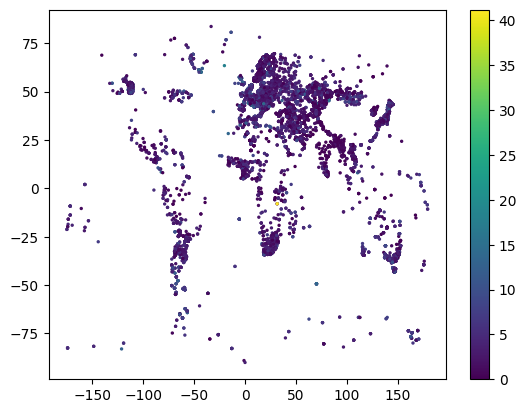

In [94]:

subsample = 100
# turn timestamps into seconds

plt.scatter(df['LON'][::subsample], df['LAT'][::subsample], s=2, c=df['WNDSQ1.WSPD'][::subsample], cmap='viridis')
plt.colorbar()
plt.show()